In [2]:
"""
Step 2.1 — Import required libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml

# Optional: make plots look nicer
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


ModuleNotFoundError: No module named 'matplotlib'

In [4]:
!pip install numpy pandas matplotlib seaborn scikit-learn


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [6]:
"""
Step 2.2 — Load the Boston Housing Dataset
"""
from sklearn.datasets import fetch_openml  # this helps us load datasets online

# this function downloads the "Boston" dataset and stores it as a pandas DataFrame
boston = fetch_openml(name="Boston", version=1, as_frame=True)

# we take the data and put it into a variable called df (stands for DataFrame)
df = boston.frame.copy()

# print how many rows and columns the dataset has
print("Dataset shape:", df.shape)

# show the first 5 rows of the dataset
df.head()


Dataset shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
"""
Step 2.3 — Dataset information and summary statistics
"""

# 1️⃣ Show info about columns (data type, non-null count, etc.)
df.info()

# 2️⃣ Show descriptive statistics for all numeric columns
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000


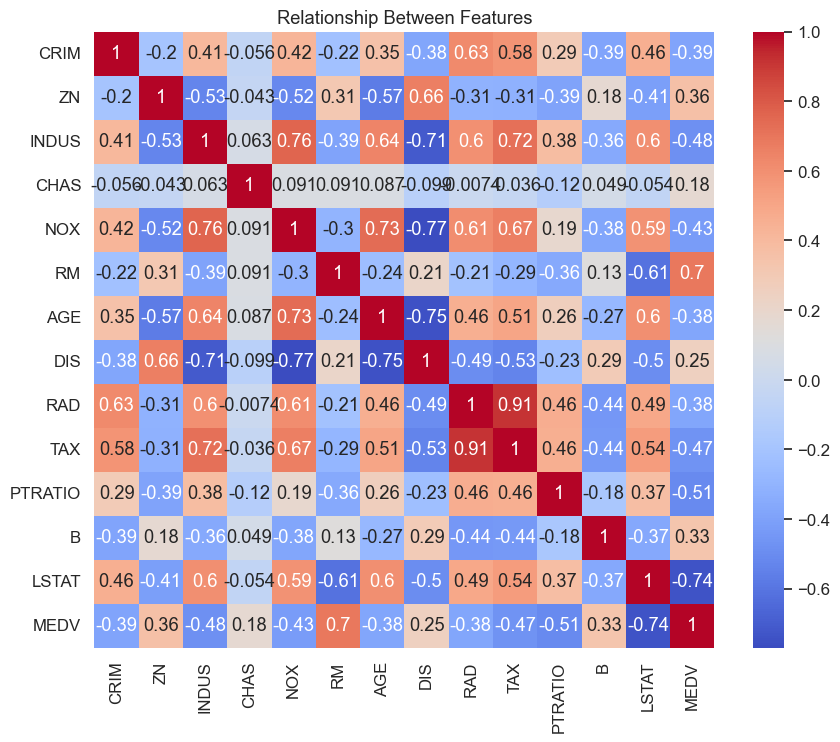

In [8]:
# Step 3.1 — See how features are related
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Relationship Between Features")
plt.show()


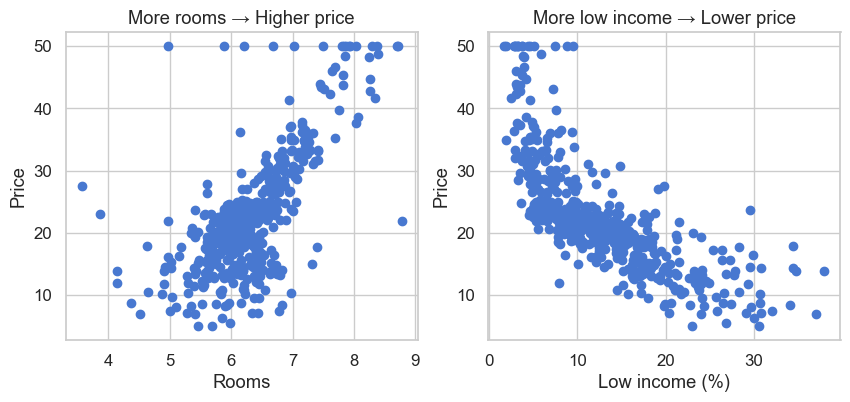

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

# 1️⃣ Rooms vs Price
plt.subplot(1,2,1)
plt.scatter(df["RM"], df["MEDV"])
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.title("More rooms → Higher price")

# 2️⃣ Low income vs Price
plt.subplot(1,2,2)
plt.scatter(df["LSTAT"], df["MEDV"])
plt.xlabel("Low income (%)")
plt.ylabel("Price")
plt.title("More low income → Lower price")

plt.show()


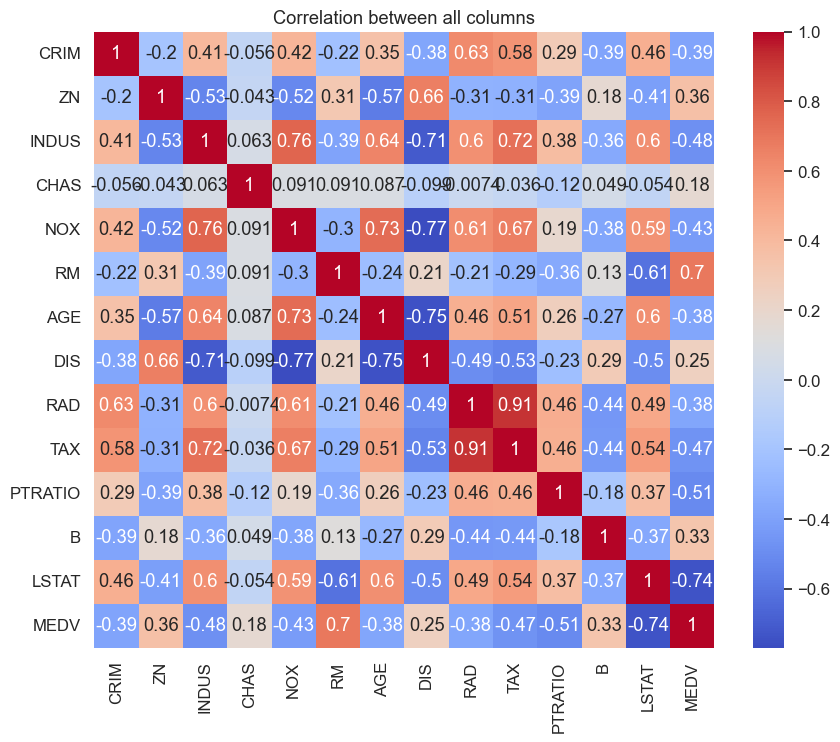

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between all columns")
plt.show()


In [11]:
corr_with_price = df.corr()["MEDV"].sort_values(ascending=False)
print(corr_with_price)


MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [14]:
from sklearn.preprocessing import StandardScaler

# X = features (things that affect price)
X = df[["RM", "LSTAT", "PTRATIO", "TAX"]]

# y = target (the price)
y = df["MEDV"]

# make all numbers similar in size
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Now all numbers are in similar size (around -2 to +2):")
print(X_scaled[:5])


Now all numbers are in similar size (around -2 to +2):
[[ 0.41367189 -1.0755623  -1.45900038 -0.66660821]
 [ 0.19427445 -0.49243937 -0.30309415 -0.98732948]
 [ 1.28271368 -1.2087274  -0.30309415 -0.98732948]
 [ 1.01630251 -1.36151682  0.1130321  -1.10611514]
 [ 1.22857665 -1.02650148  0.1130321  -1.10611514]]


In [13]:
from sklearn.model_selection import train_test_split

# split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training data:", X_train.shape, y_train.shape)
print("Testing data:", X_test.shape, y_test.shape)


Training data: (404, 6) (404,)
Testing data: (102, 6) (102,)


In [15]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# teach the model using training data
model.fit(X_train, y_train)

# see the coefficients (how much each feature affects price)
print("Feature coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Feature coefficients: [ 3.22647172 -4.08381135 -2.00841044 -0.43900869 -2.55385953 -1.8377647 ]
Intercept: 22.44680980808414


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# make predictions on testing data
y_pred = model.predict(X_test)

# calculate errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae,2))
print("RMSE:", round(rmse,2))
print("R²:", round(r2,2))


MAE: 3.28
RMSE: 5.05
R²: 0.65


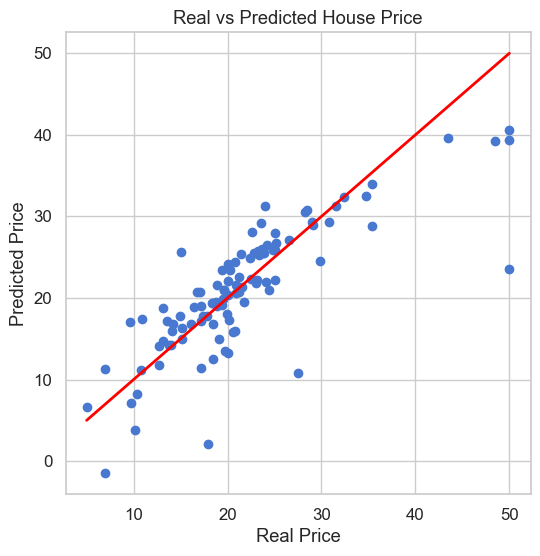

In [17]:
plt.figure(figsize=(6,6))

# scatter plot: real vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2)  # perfect prediction line

plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title("Real vs Predicted House Price")
plt.show()
